In [1]:
import os
from PIL import Image
import numpy as np

images = []
classification = []

folder_path_diseased = 'src/neural_network/DENGUE_DATA_DNN/Diseased'
folder_path_healthy = 'src/neural_network/DENGUE_DATA_DNN/Healthy'

print(len(os.listdir(folder_path_diseased)))

# Iterate through all files in the diseased folder
for file_name in os.listdir(folder_path_diseased):
    if file_name.endswith('.tiff') or file_name.endswith('.tif'):  # Check if the file is a TIFF file
        image = Image.open(os.path.join(folder_path_diseased, file_name))
        image = image.resize((133,100))
        image = image.convert('L')
        image_array = np.array(image)

        image_array = image_array.astype('float32') / 255.0
        images.append(image_array)
        classification.append(1)

print(len(os.listdir(folder_path_healthy)))

# Iterate through all files in the healthy folder
for file_name in os.listdir(folder_path_healthy):
    if file_name.endswith('.tiff') or file_name.endswith('.tif'): 
        image = Image.open(os.path.join(folder_path_healthy, file_name))
        image = image.resize((133,100))
        image = image.convert('L')
        image_array = np.array(image)

        image_array = image_array.astype('float32') / 255.0
        images.append(image_array)
        classification.append(0)

# Convert the list of images to a numpy array
images_array = np.array(images)
classification = np.array(classification).reshape(-1,1)

# Check the shape of the array
print("Shape of images array:", images_array.shape)
print(classification)


460
300
Shape of images array: (760, 100, 133)
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 133, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 131, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 65, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 29, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 38976)             0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_array, classification, test_size=0.2, random_state=42)
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_test = y_test.astype(float)
y_train = y_train.astype(float)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (608, 100, 133)
X_test shape: (152, 100, 133)
y_train shape: (608, 1)
y_test shape: (152, 1)


In [4]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200


2024-03-19 10:49:28.728282: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19/19 [==============================] - 2s 78ms/step - loss: 0.7995 - accuracy: 0.5444
Epoch 2/200
19/19 [==============================] - 2s 83ms/step - loss: 0.6772 - accuracy: 0.6102
Epoch 3/200
19/19 [==============================] - 1s 79ms/step - loss: 0.6699 - accuracy: 0.6102
Epoch 4/200
19/19 [==============================] - 2s 82ms/step - loss: 0.6681 - accuracy: 0.6102
Epoch 5/200
19/19 [==============================] - 2s 83ms/step - loss: 0.6751 - accuracy: 0.6102
Epoch 6/200
19/19 [==============================] - 2s 82ms/step - loss: 0.6697 - accuracy: 0.6102
Epoch 7/200
19/19 [==============================] - 2s 81ms/step - loss: 0.6727 - accuracy: 0.6102
Epoch 8/200
19/19 [==============================] - 2s 89ms/step - loss: 0.6701 - accuracy: 0.6102
Epoch 9/200
19/19 [==============================] - 2s 83ms/step - loss: 0.6690 - accuracy: 0.6102
Epoch 10/200
19/19 [==============================] - 2s 82ms/step - loss: 0.6698 - accuracy: 0.6102
Epoch 11/20

KeyboardInterrupt: 

In [5]:
import numpy as np

i=149
# Assuming X_test[0,:,:] contains a single sample
# Reshape the input to match the expected shape
input_data = np.expand_dims(X_test[i,:,:], axis=0)

# Predict on the reshaped input
prediction = model.predict(input_data)

# Print the prediction and the corresponding ground truth
print("Prediction:", prediction)
print("Ground Truth:", y_test[i])


1/1 [==============================] - 0s 55ms/step
Prediction: [[1.]]
Ground Truth: [1.]


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("R2:", r2)

5/5 [==============================] - 0s 26ms/step
Accuracy: 0.9736842105263158
R2: 0.9073207168563262


Convolutional Layer: conv2d
Kernel Size: (3, 3, 1, 32)
Kernels:


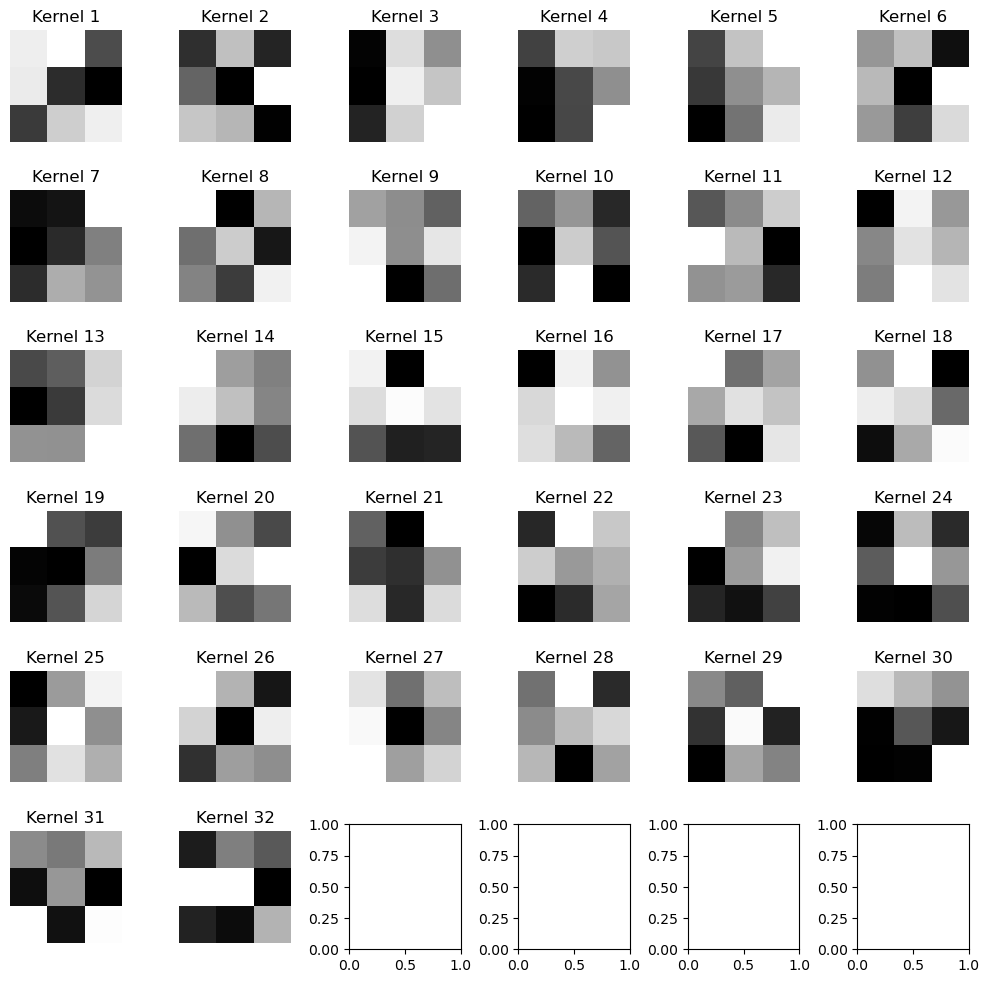

Convolutional Layer: conv2d_1
Kernel Size: (3, 3, 32, 64)
Kernels:


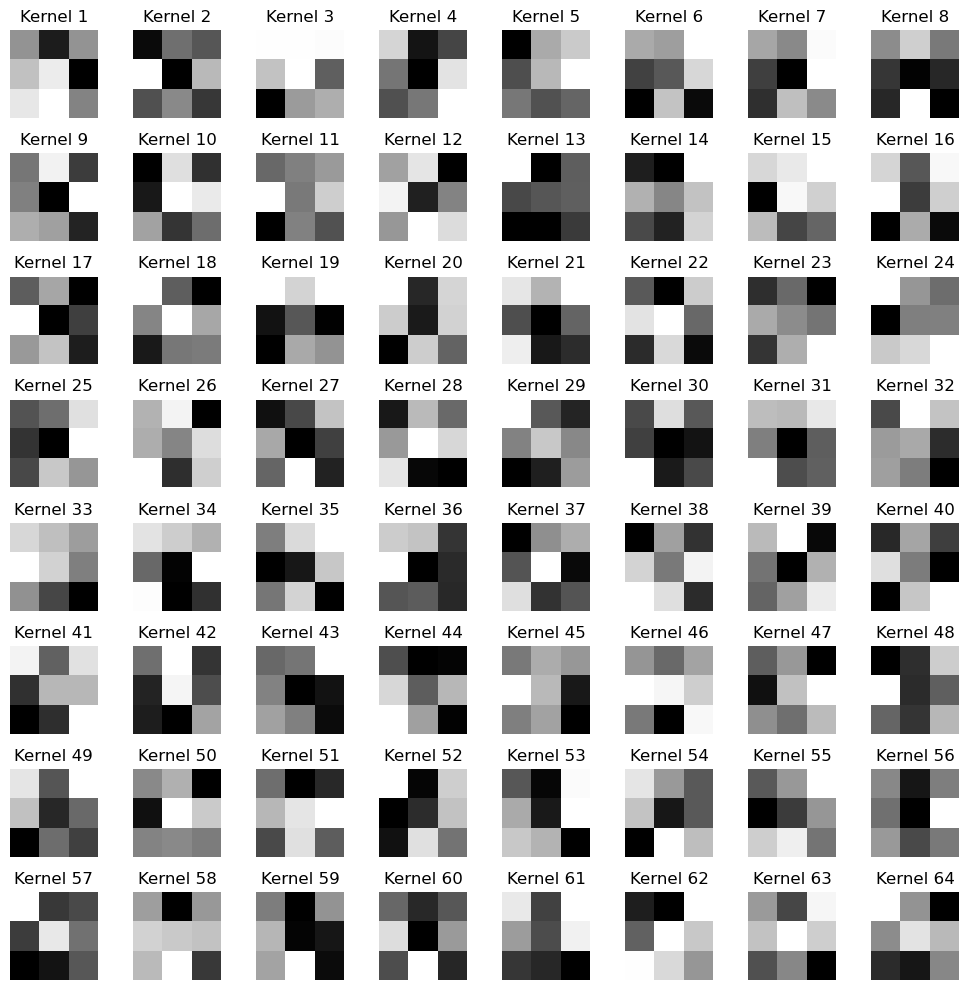

Convolutional Layer: conv2d_2
Kernel Size: (3, 3, 64, 64)
Kernels:


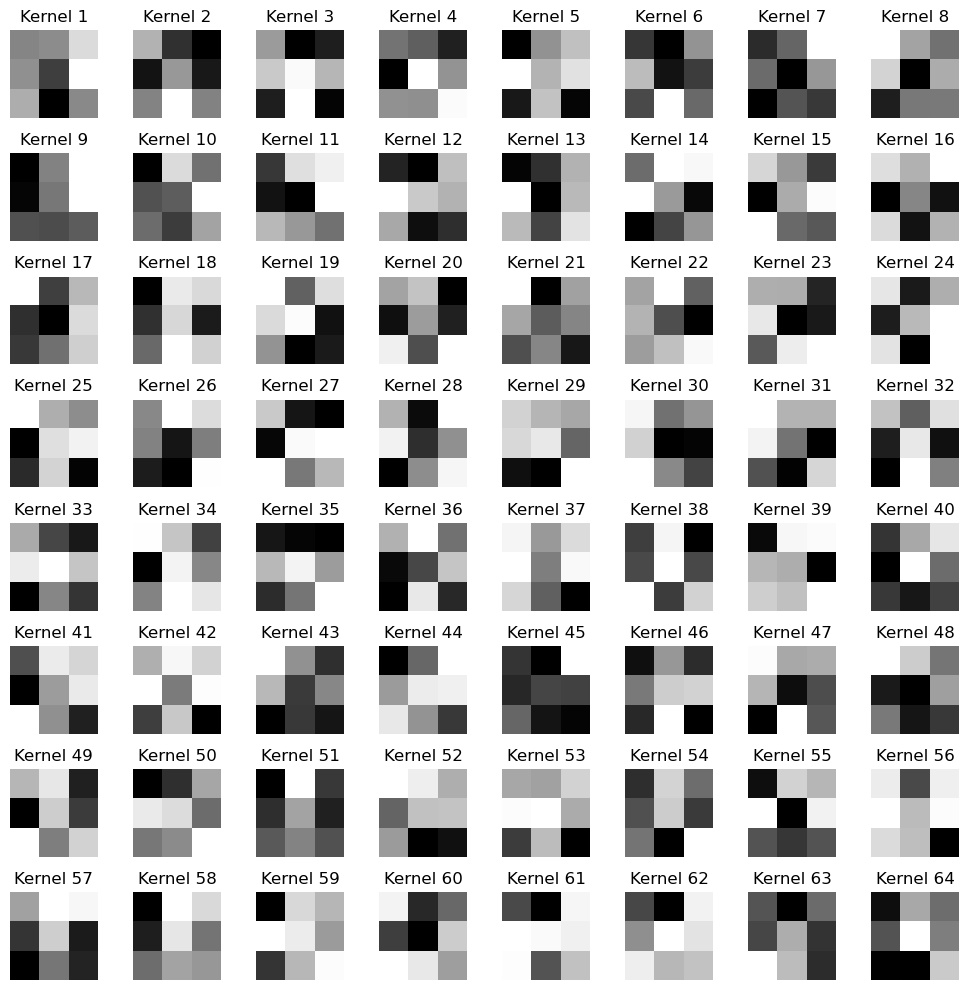

In [7]:
import matplotlib.pyplot as plt

# Iterate through the layers of the model
for layer in model.layers:
    # Check if the layer is a Conv2D layer
    if isinstance(layer, tf.keras.layers.Conv2D):
        # Get the weights of the convolutional layer
        weights = layer.get_weights()[0]
        # Print the kernels of the convolutional layer
        print("Convolutional Layer:", layer.name)
        print("Kernel Size:", weights.shape)
        print("Kernels:")
        
        # Calculate the number of rows and columns for subplots
        num_rows = int(np.ceil(np.sqrt(weights.shape[3])))
        num_cols = int(np.ceil(weights.shape[3] / num_rows))
        
        # Create a figure
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
        
        # Plot each kernel
        for i in range(num_rows):
            for j in range(num_cols):
                kernel_index = i * num_cols + j
                if kernel_index < weights.shape[3]:
                    kernel = weights[:, :, :, kernel_index]
                    
                    # Normalize the kernel image to the range [0, 1]
                    kernel_min = kernel.min()
                    kernel_max = kernel.max()
                    kernel_normalized = (kernel - kernel_min) / (kernel_max - kernel_min)
                    
                    # Plot the kernel on the corresponding axis
                    axes[i, j].imshow(kernel_normalized[:, :, 0], cmap='gray')  # Display only one channel
                    axes[i, j].set_title(f'Kernel {kernel_index+1}')
                    axes[i, j].axis('off')
        
        # Adjust layout and display the figure
        plt.tight_layout()
        plt.show()
        
        print("===================================")
